# Load Models

In [1]:
!gdown --id 1NecoacY-Teqo2RQJLOrpQ41p_5J2nHgx

Downloading...
From: https://drive.google.com/uc?id=1NecoacY-Teqo2RQJLOrpQ41p_5J2nHgx
To: /content/NewDemo.zip
100% 210M/210M [00:01<00:00, 180MB/s]


In [2]:
!unzip NewDemo.zip

Archive:  NewDemo.zip
   creating: NewDemo/
   creating: NewDemo/Encoder_TripleVAE/
   creating: NewDemo/Encoder_TripleVAE/assets/
  inflating: NewDemo/Encoder_TripleVAE/keras_metadata.pb  
  inflating: NewDemo/Encoder_TripleVAE/saved_model.pb  
   creating: NewDemo/Encoder_TripleVAE/variables/
  inflating: NewDemo/Encoder_TripleVAE/variables/variables.data-00000-of-00001  
  inflating: NewDemo/Encoder_TripleVAE/variables/variables.index  
  inflating: NewDemo/fake_news.plk   
  inflating: NewDemo/kmeans_12.pkl   
  inflating: NewDemo/kmeans_15.pkl   
  inflating: NewDemo/kmeans_3.pkl    
  inflating: NewDemo/kmeans_6.pkl    
  inflating: NewDemo/kmeans_9.pkl    


## Load Bi-VAE-Density

In [3]:
import tensorflow as tf

tripleVAE = tf.keras.models.load_model('NewDemo/Encoder_TripleVAE')

## Load Kmeans

In [4]:
import pickle

l_kmeans = []

for k in [3,6,9,12,15]:
  with open('NewDemo/kmeans_' + str(k) + '.pkl', 'rb') as file:
    l_kmeans.append(pickle.load(file))

## Load fake news of train

In [5]:
import pandas as pd
import numpy as np
df_fk_train = pd.read_pickle('NewDemo/fake_news.plk')
df_train = np.array(df_fk_train['DistilBERT Multilingua'].to_list())

# DBERTML Embeddings (USE GPU)

In [6]:
!pip install sentence-transformers==1.0.4 #version used in the fake news collections

     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 3.5 MB 31.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
     |████████████████████████████████| 6.8 MB 31.6 MB/s 
     |████████████████████████████████| 895 kB 31.2 MB/s 
     |████████████████████████████████| 67 kB 4.5 MB/s 
     |████████████████████████████████| 596 kB 33.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.4-py3-none-any.whl size=114306 sha256=5190dc2423eb6810df513f096e6659762e46f7ffc2ea06b1ac43af103de20775
  Stored in directory: /root/.cache/pip/wheels/36/29/9e/1d73f2751adb27f61c414d2656cef08c8353b9ad7cb7f149ef
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
from sentence_transformers import SentenceTransformer

In [8]:
def sentence_embedding(txts):

  model = SentenceTransformer('distiluse-base-multilingual-cased')

  sentences =[]

  for txt in txts:
    txt.replace('\\\\t', ' ')
    txt.replace('\\\\r', ' ')
    txt.replace('\\\\n',' ')
    txt.replace('\\t', ' ')
    txt.replace('\\r', ' ')
    txt.replace('\\n',' ')
    txt.replace('\t', ' ')
    txt.replace('\r', ' ')
    txt.replace('\n',' ')
    sentences.append(txt)

  sentence_embeddings = model.encode(sentences)

  return sentence_embeddings 

# Density Information

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np 

def return_density_inf(l_kmeans, df_train, df_new):
    l_x_new = []

    len_train = len(df_train)
    len_new = len(df_new)

    for kmeans in l_kmeans:
        x_new_temp = []

        dfs = np.concatenate([df_train, df_new])
        labels = np.concatenate([kmeans.labels_, kmeans.predict(df_new)])
          
        silho = silhouette_samples(dfs, labels).reshape(len_train + len_new, 1)
        l_x_new.append(silho[len_train:])

    return np.concatenate(l_x_new, axis=1)

# LIWC


In [10]:
columns_liwc = ['social','family', 'leisure', 'home', 'cogmech', 'funct', 'adverb', 'preps', 'conj', 'article', 'affect', 'negemo', 'anger', 'negate', 'excl', 'insight', 'time', 'relativ', 'verb', 'present', 'pronoun', 'ipron','auxverb', 'incl', 'ppron', 'you','number','work','quant','tentat','achieve','posemo','space','past','cause', 'inhib','future','discrep','shehe','sad','certain','bio','body','sexual','percept','feel', 'relig','anx','death','humans', 'money','motion', 'we', 'hear','i', 'see', 'swear','health','nonfl','they', 'assent','filler','ingest','friend','non_immediacy','incertainty','pausality','emotiveness']

In [11]:
!gdown --id 1-2oC18R8lBDfZhPVNutFBrr_cveEQCjX

Downloading...
From: https://drive.google.com/uc?id=1-2oC18R8lBDfZhPVNutFBrr_cveEQCjX
To: /content/min_max_scaler_LIWC.save
100% 3.33k/3.33k [00:00<00:00, 5.83MB/s]


In [12]:
import joblib
min_max_scaler_LIWC = joblib.load('min_max_scaler_LIWC.save') 

In [13]:
!gdown --id 1ybt-bi6H0gAHL0fQNaleDEtlCwmBeyPn

Downloading...
From: https://drive.google.com/uc?id=1ybt-bi6H0gAHL0fQNaleDEtlCwmBeyPn
To: /content/LiwcFeatures.zip
100% 8.57M/8.57M [00:00<00:00, 64.0MB/s]


In [14]:
!unzip LiwcFeatures.zip

Archive:  LiwcFeatures.zip
  inflating: get_liwc_features.ipynb  
  inflating: indexes.npy             
  inflating: labels.npy              
   creating: dictionaries/
  inflating: dictionaries/LIWC2007_English.dic  
  inflating: dictionaries/LIWC2007_Portugues_win.dic  
   creating: liwc/
  inflating: liwc/liwc.py            
  inflating: liwc/test_liwc.py       
  inflating: liwc/__init__.py        
   creating: liwc/__pycache__/
  inflating: liwc/__pycache__/liwc.cpython-37.pyc  
  inflating: liwc/__pycache__/liwc.cpython-38.pyc  
  inflating: liwc/__pycache__/__init__.cpython-37.pyc  
  inflating: liwc/__pycache__/__init__.cpython-38.pyc  
  inflating: fnc0.pkl                


In [15]:
from liwc.liwc import Liwc

liwc_pt = Liwc('dictionaries/LIWC2007_Portugues_win.dic')

liwc_en = Liwc('dictionaries/LIWC2007_English.dic')

import pickle
import numpy as np
import pandas as pd
from sklearn import preprocessing
import collections

In [16]:
def new_dicts(dict_liwc, list_features):

  for feature in list_features:
    if feature not in dict_liwc:
      dict_liwc.update({feature :0.0})
  
  return dict_liwc

def return_LIWC(textual_documents, language):
  
  dict_types = {}

  if language == 'pt':
    liwc = liwc_pt
  else: 
    liwc = liwc_en

  for i in range(len(textual_documents)):
    txt = str(textual_documents[i]).lower()
    dict_liwc = liwc.parse(txt.split(' '))
    
    dict_types[i] = new_dicts(dict_liwc, columns_liwc)

  data_features = pd.DataFrame.from_dict(dict_types, orient='index').fillna(0)

  return data_features

def return_LIWC_normalized(data_features):

  x = data_features.values

  x_scaled = min_max_scaler_LIWC.transform(x)
  data_normalized = pd.DataFrame(x_scaled, index=data_features.index, columns=data_features.columns)

  return data_normalized

# DEMO
## Examples from https://g1.globo.com/fato-ou-fake/

In [17]:
!gdown --id 16LwNrCuq_teUzT5Erb8mPxvKtgwC8yfA

Downloading...
From: https://drive.google.com/uc?id=16LwNrCuq_teUzT5Erb8mPxvKtgwC8yfA
To: /content/fakenews_G1.plk
100% 737k/737k [00:00<00:00, 74.9MB/s]


In [18]:
df_fake_g1 = pd.read_pickle('fakenews_G1.plk')

In [19]:
df_fake_g1

,type,date,summary,title,url,topic
0,materia,2019-12-10 20:22:26.879000+00:00,Mensagens que atribuem imagens à jovem ambient...,É #FAKE que jovem com metralhadora em vídeo se...,https://g1.globo.com/fato-ou-fake/noticia/2019...,FAKE
1,materia,2019-12-05 20:08:49.640000+00:00,Mensagem falsa circula em redes sociais com vá...,É #FAKE que atual presidente da UNE está cursa...,https://g1.globo.com/fato-ou-fake/noticia/2019...,FAKE
2,materia,2019-12-05 17:11:26.343000+00:00,Imagens correspondem a gravação da série 'Arca...,É #FAKE que vídeo mostre traficante sendo 'aba...,https://g1.globo.com/fato-ou-fake/noticia/2019...,FAKE
3,materia,2019-12-05 16:22:38.498000+00:00,Vídeo de dupla armada em moto ao som similar a...,É #FAKE que imagens de homem com arma para o a...,https://g1.globo.com/fato-ou-fake/noticia/2019...,FAKE
4,materia,2019-12-04 21:56:19.876000+00:00,Imagens de agressão a policiais circulam como ...,É #FAKE que vídeo em que grupo joga garrafas e...,https://g1.globo.com/fato-ou-fake/noticia/2019...,FAKE
...,...,...,...,...,...,...
3,materia,2020-08-25 22:19:38.758000+00:00,"WhatsApp informa que aviso foi, de fato, emiti...",É #FAKE mensagem que fala que aviso de privaci...,https://g1.globo.com/fato-ou-fake/noticia/2020...,FAKE
4,materia,2020-08-25 16:37:17.638000+00:00,Mensagem diz que decisão foi oferecer espetácu...,É #FAKE que vídeo mostre show de fogos de arti...,https://g1.globo.com/fato-ou-fake/noticia/2020...,FAKE
5,materia,2020-08-24 23:30:59.280000+00:00,Advogado de João de Deus afirma que ele não de...,É #FAKE que João de Deus disse que ministros d...,https://g1.globo.com/fato-ou-fake/noticia/2020...,FAKE
6,materia,2020-08-24 18:10:35.925000+00:00,Texto que circula pelas redes sociais usa info...,É #FAKE que uso de máscara contra o coronavíru...,https://g1.globo.com/fato-ou-fake/coronavirus/...,FAKE


In [20]:
text = df_fake_g1.iloc[3]['summary']
text

'Vídeo de dupla armada em moto ao som similar ao de tiros e foto de jovem com colete da PM foram feitos em 2016, na Zona Norte de São Paulo, assim como imagens de homens armados em carro.'

In [21]:
inputs = [text]

In [22]:
embeddings_DBERTML = sentence_embedding(inputs)

  0%|          | 0.00/504M [00:00<?, ?B/s]

In [23]:
densities = return_density_inf(l_kmeans, df_train, np.array(embeddings_DBERTML))

In [24]:
language = 'pt'
liwc_rep_features = return_LIWC(inputs, language)
liwc_rep_features_columnsLIWC = liwc_rep_features[columns_liwc]
liwc_text_train = return_LIWC_normalized(liwc_rep_features_columnsLIWC).to_numpy()

In [25]:
embeddings_TripleVAE, _, _ = tripleVAE.predict([embeddings_DBERTML,densities,liwc_text_train]) 

# Top texts most similars

In [26]:
densities_train = return_density_inf(l_kmeans, df_train, df_train)
embeddings_train, _, _ = tripleVAE.predict([df_train,densities_train, np.array(df_fk_train['LIWC_normalized'].to_list())]) 

In [27]:
df_bests = df_fk_train
df_bests['Embeddings_TVAE'] = list(embeddings_train)

In [28]:
from scipy.spatial import distance

In [29]:
embedding_top10 = embeddings_TripleVAE[0]

In [30]:
l_dist = []
for item,row in df_bests.iterrows():
  l_dist.append(distance.euclidean(embedding_top10, row['Embeddings_TVAE']))

df_bests['distance_euclidean'] = l_dist

In [31]:
df_fakenews = df_bests.sort_values(by='distance_euclidean', ascending=True)[['text','Embeddings_TVAE','class','distance_euclidean']]

In [32]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(df_fakenews, num_vizinhos=10):
    labels = []
    tokens = []

    top_num_viz = df_fakenews[:num_vizinhos]
    count = 0
    for item,row in top_num_viz.iterrows():
      tokens.append(row['Embeddings_TVAE'].tolist())
      labels.append(count)
      count+=1
    tokens.append(embeddings_TripleVAE[0])
    labels.append('NEW_TEXT')
    
    tsne_model = TSNE(perplexity=30, n_components=2)

    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


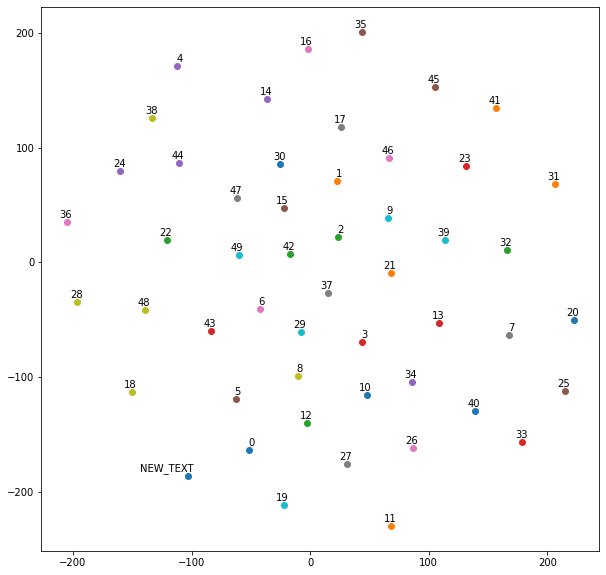

In [33]:
tsne_plot(df_fakenews, 50)

In [34]:
df = df_fakenews.reset_index()

In [35]:
df[:10]

,index,text,Embeddings_TVAE,class,distance_euclidean
0,1996,paraná câmeras da prf flagram uma colisão entr...,"[9.5636584e-05, -0.01286095, 0.044525594, 0.01...",1,0.543900
1,1888,urgente facções rio grande norte entram em con...,"[-0.05432204, -0.03978619, 0.008119197, 0.0374...",1,0.587929
2,487,bombeiro furta caminhão de quartel para jogar ...,"[0.0059350757, 0.0051937164, 0.0589333, 0.0472...",1,0.601731
3,2132,você acredita em lei da atração adolescente po...,"[0.0056318073, -0.043853287, 0.052131906, 0.03...",1,0.603031
4,755,frota posta foto instagram e zé babão cuspidor...,"[0.03080969, 0.024489917, 0.021827102, 0.00828...",1,0.610336
5,7,em fortaleza homem sofre infarto andando de bi...,"[-0.00019610347, -0.012191394, 0.0571083, 0.01...",1,0.612104
6,3149,filho de viceprefeita é flagrado dirigindo e o...,"[0.006516658, 0.002923164, 0.03988207, 0.03720...",1,0.615203
7,914,artistas nordestinos ficam indignados com decl...,"[-0.021103855, -0.077090114, 0.020559223, 0.00...",1,0.620807
8,2308,taxista confunde viatura com uber ataca carro ...,"[0.03088582, -0.059681278, 0.10378091, 0.00937...",1,0.621520
9,2289,jovem que invadiu alvorada está sob custódia e...,"[-0.00056406436, 0.003593938, 0.07395656, 0.03...",1,0.622003
